In [1]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data into Jupyter Notebook
df = pd.read_csv("weatherHistory.csv")

In [3]:
# see the first 5 data rows
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.


In [4]:
# Now we need to drop the unwanted data:
req_data = ["Formatted Date", "Apparent Temperature (C)","Humidity"]
df1 = df[req_data]

In [5]:
df1.head()

,Formatted Date,Apparent Temperature (C),Humidity
0,2006-04-01 00:00:00.000 +0200,7.388889,0.89
1,2006-04-01 01:00:00.000 +0200,7.227778,0.86
2,2006-04-01 02:00:00.000 +0200,9.377778,0.89
3,2006-04-01 03:00:00.000 +0200,5.944444,0.83
4,2006-04-01 04:00:00.000 +0200,6.977778,0.83


In [6]:
# convert the data into our need and resample our data :
df1['Formatted Date'] = pd.to_datetime(df1['Formatted Date'], utc=True)
df2 = df1.set_index('Formatted Date')
df2 = df2.resample('MS').mean()

C:\Users\bhanuchandra\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [7]:
df2.head()

,Apparent Temperature (C),Humidity
Formatted Date,,
2005-12-01 00:00:00+00:00,-4.050000,0.890000
2006-01-01 00:00:00+00:00,-4.173708,0.834610
2006-02-01 00:00:00+00:00,-2.990716,0.843467
2006-03-01 00:00:00+00:00,1.969780,0.778737
2006-04-01 00:00:00+00:00,12.098827,0.728625


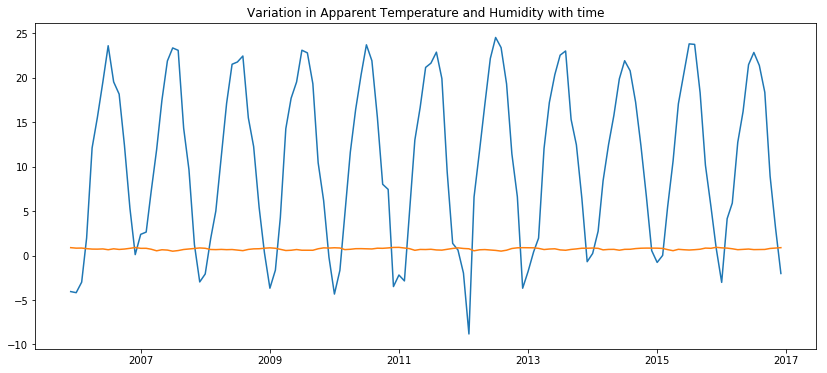

In [8]:
# Now let us plot our data in a line graph
plt.figure(figsize=(14,6))
plt.title("Variation in Apparent Temperature and Humidity with time")
plt.plot(df2)

As we can see, both the peaks and the troughs are almost same throughout the period of 10 years. Here is a plot of the average temperature and humidity of the month of April over 10 years.

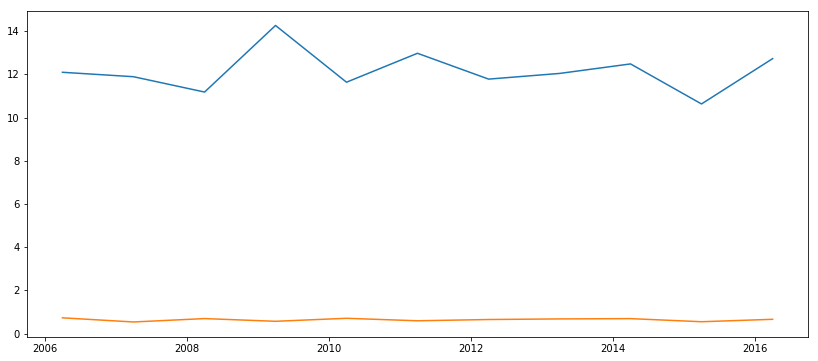

In [9]:
april_df = df2[df2.index.month==4]
plt.figure(figsize=(14,6))
plt.plot(april_df)

'''We can clearly see that there is a sharp rise in temperature in the year of 2009 whereas there is a fall in temperature in the year of 2015. Hence we can conclude that global warming has caused an uncertainty in temperature over the past 10 years while the average humidity as remained constant throughout the 10 years.'''